# Visualização de Dados com Matplotlib e Seaborn (Dados de Venda)

---

## Objetivos

Neste notebook, você aprenderá a:
- Criar visualizações impactantes com **Matplotlib**
- Utilizar o **Seaborn** para gráficos estatísticos avançados
- Escolher o tipo de gráfico adequado para cada análise
- Customizar visualizações para apresentações profissionais
- Contar histórias através de dados (Data Storytelling)
- Aplicar boas práticas de visualização

## Bibliotecas Utilizadas

- **Matplotlib**: Biblioteca fundamental para visualização em Python
- **Seaborn**: Built on top of Matplotlib, oferece gráficos estatísticos elegantes
- **Pandas**: Manipulação e preparação dos dados

> **Nota:** Usaremos a mesma base de dados de vendas da aula anterior.

---
##1. Importação das Bibliotecas

Vamos configurar nosso ambiente de visualização.

In [ ]:
# Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configurações gerais
warnings.filterwarnings('ignore')
%matplotlib inline

# Configurações de estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Bibliotecas importadas com sucesso!")
print(f"  Matplotlib versão: {plt.matplotlib.__version__}")
print(f"  Seaborn versão: {sns.__version__}")
print(f"  Pandas versão: {pd.__version__}")

Bibliotecas importadas com sucesso!
  Matplotlib versão: 3.10.0
  Seaborn versão: 0.13.2
  Pandas versão: 2.2.2


---
## 2. Carregamento e Preparação dos Dados

Vamos recriar nossa base de dados de vendas.

In [ ]:
# Criando o dataset
dados = {
    'data': ['2025-01-15', '2025-01-16', '2025-01-16', '2025-01-17', '2025-01-18',
             '2025-01-19', '2025-01-20', '2025-01-20', '2025-01-21', '2025-01-22'],
    'produto': ['Notebook', 'Mouse', 'Teclado', 'Monitor', 'Notebook',
                'Mouse', 'Webcam', 'Teclado', 'Monitor', 'Notebook'],
    'categoria': ['Computadores', 'Periféricos', 'Periféricos', 'Monitores', 'Computadores',
                  'Periféricos', 'Periféricos', 'Periféricos', 'Monitores', 'Computadores'],
    'quantidade': [2, 5, 3, 1, 1, 8, 2, 4, 2, 3],
    'preco_unitario': [3500.00, 45.00, 180.00, 890.00, 3200.00,
                       52.00, 250.00, 180.00, 920.00, 3800.00],
    'vendedor': ['Ana', 'Carlos', 'Ana', 'Beatriz', 'Carlos',
                 'Ana', 'Beatriz', 'Carlos', 'Ana', 'Beatriz']
}

df = pd.DataFrame(dados)

# Transformações
df['data'] = pd.to_datetime(df['data'])
df['valor_total'] = df['quantidade'] * df['preco_unitario']
df['mes'] = df['data'].dt.month
df['dia_semana'] = df['data'].dt.day_name()
df['dia'] = df['data'].dt.day

print("Dataset criado com sucesso!")
print(f"  Total de registros: {len(df)}")
print(f"  Período: {df['data'].min().strftime('%d/%m/%Y')} a {df['data'].max().strftime('%d/%m/%Y')}")
print(f"  Faturamento total: R$ {df['valor_total'].sum():,.2f}")

display(df.head())

Dataset criado com sucesso!
  Total de registros: 10
  Período: 15/01/2025 a 22/01/2025
  Faturamento total: R$ 26,731.00


,data,produto,categoria,quantidade,preco_unitario,vendedor,valor_total,mes,dia_semana,dia
0,2025-01-15,Notebook,Computadores,2,3500.0,Ana,7000.0,1,Wednesday,15
1,2025-01-16,Mouse,Periféricos,5,45.0,Carlos,225.0,1,Thursday,16
2,2025-01-16,Teclado,Periféricos,3,180.0,Ana,540.0,1,Thursday,16
3,2025-01-17,Monitor,Monitores,1,890.0,Beatriz,890.0,1,Friday,17
4,2025-01-18,Notebook,Computadores,1,3200.0,Carlos,3200.0,1,Saturday,18


---
## 3. Gráficos Básicos com Matplotlib

Vamos começar com visualizações fundamentais usando Matplotlib.

### 3.1 Gráfico de Linhas - Vendas ao Longo do Tempo

In [ ]:
# Agregar vendas por data
vendas_dia = df.groupby('data')['valor_total'].sum().reset_index()
vendas_dia

,data,valor_total
0,2025-01-15,7000.0
1,2025-01-16,765.0
2,2025-01-17,890.0
3,2025-01-18,3200.0
4,2025-01-19,416.0
5,2025-01-20,1220.0
6,2025-01-21,1840.0
7,2025-01-22,11400.0


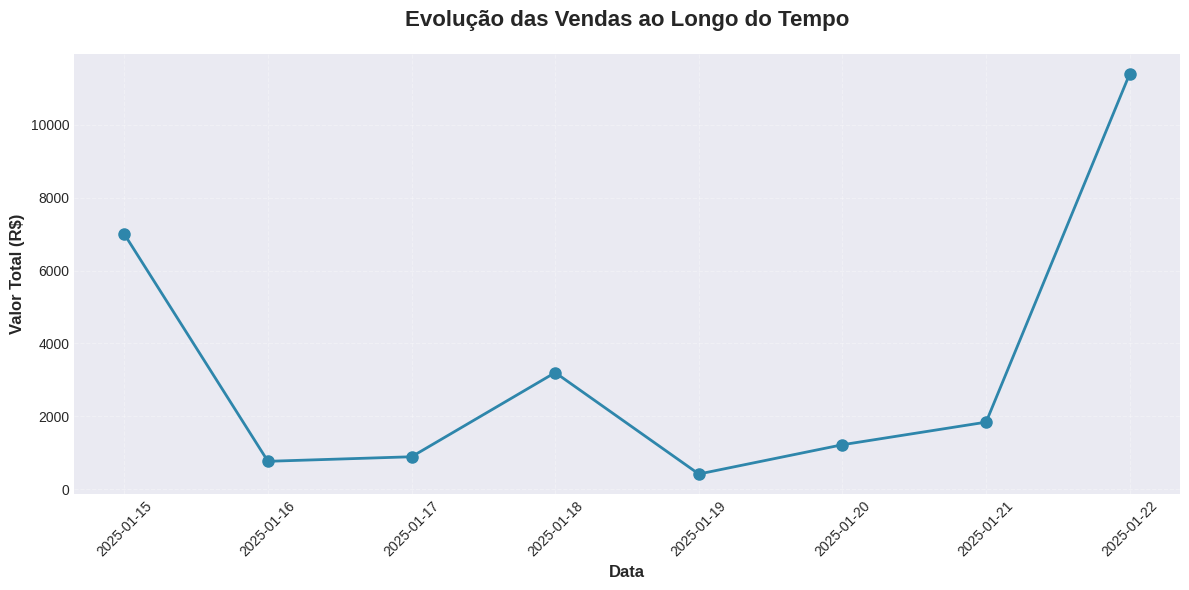

Interpretação:
  - Observe a tendência de crescimento/queda
  - Identifique picos e quedas significativas
  - Útil para análise temporal


In [ ]:
# Criar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(vendas_dia['data'], vendas_dia['valor_total'],
         marker='o', linewidth=2, markersize=8, color='#2E86AB')

# Customização
plt.title('Evolução das Vendas ao Longo do Tempo', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Data', fontsize=12, fontweight='bold')
plt.ylabel('Valor Total (R$)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()

# Adicionar valores nos pontos
# for i, row in vendas_dia.iterrows():
#     plt.text(row['data'], row['valor_total'] + 300,
#              f"R$ {row['valor_total']:,.0f}",
#              ha='center', fontsize=9)

plt.show()

print("Interpretação:")
print("  - Observe a tendência de crescimento/queda")
print("  - Identifique picos e quedas significativas")
print("  - Útil para análise temporal")

### 3.2 Gráfico de Barras - Vendas por Categoria

In [ ]:
# Agregar por categoria
vendas_categoria = df.groupby('categoria')['valor_total'].sum().sort_values(ascending=False)
vendas_categoria

,valor_total
categoria,
Computadores,21600.0
Monitores,2730.0
Periféricos,2401.0


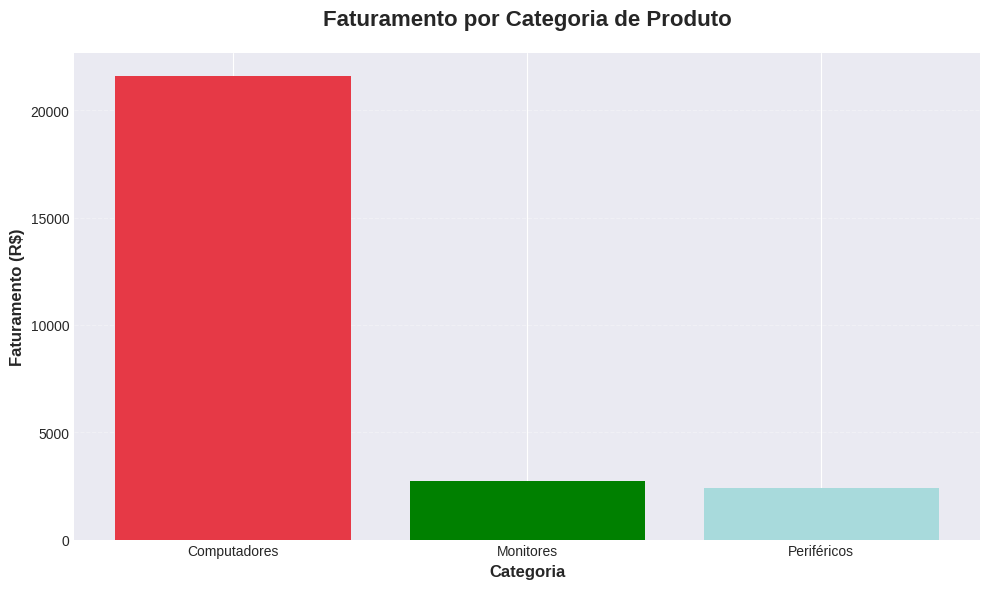


Interpretação:
  - Categoria líder: Computadores
  - Representa 80.8% do faturamento


In [ ]:

# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

cores = ['#E63946', 'green', '#A8DADC']
bars = ax.bar(vendas_categoria.index, vendas_categoria.values,
              color=cores, linewidth=1.0)

# Customização
ax.set_title('Faturamento por Categoria de Produto',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Categoria', fontsize=12, fontweight='bold')
ax.set_ylabel('Faturamento (R$)', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Adicionar valores nas barras
# for bar in bars:
#     height = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width()/2., height,
#             f'R$ {height:,.0f}',
#             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nInterpretação:")
print(f"  - Categoria líder: {vendas_categoria.index[0]}")
print(f"  - Representa {vendas_categoria.values[0]/vendas_categoria.sum()*100:.1f}% do faturamento")

### 3.3 Gráfico de Barras Horizontais - Ranking de Produtos

In [ ]:
# Top produtos
top_produtos = df.groupby('produto')['valor_total'].sum().sort_values()
top_produtos

,valor_total
produto,
Webcam,500.0
Mouse,641.0
Teclado,1260.0
Monitor,2730.0
Notebook,21600.0


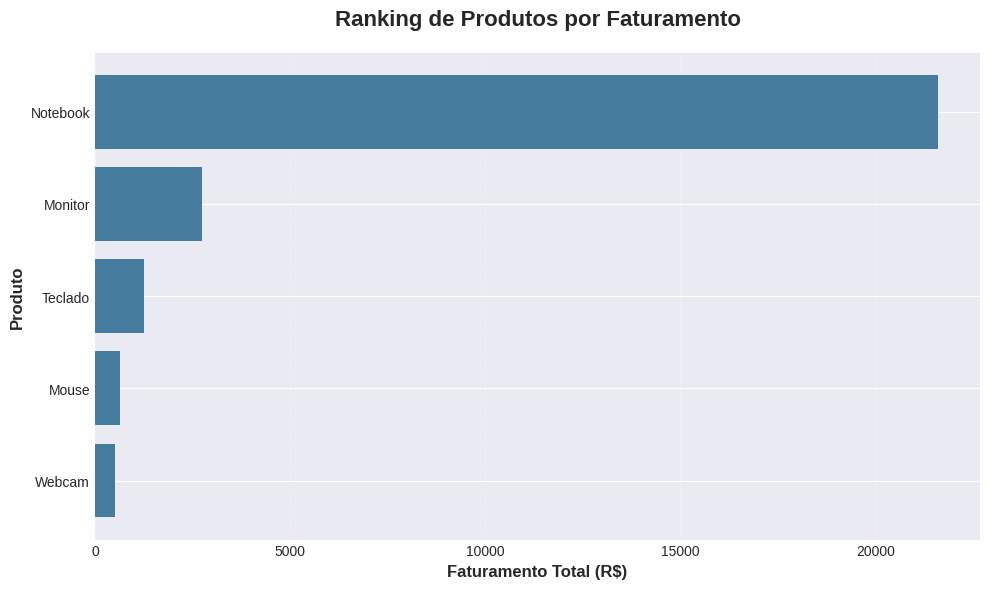

In [ ]:
# Criar gráfico horizontal
plt.figure(figsize=(10, 6))
bars = plt.barh(top_produtos.index, top_produtos.values,
                color='#457B9D', linewidth=1.2)

# Customização
plt.title('Ranking de Produtos por Faturamento',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Faturamento Total (R$)', fontsize=12, fontweight='bold')
plt.ylabel('Produto', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Adicionar valores
# for i, (produto, valor) in enumerate(top_produtos.items()):
#     plt.text(valor + 200, i, f'R$ {valor:,.0f}',
#              va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### 3.4 Gráfico de Pizza - Participação de Mercado

In [ ]:
# Preparar dados
participacao = df.groupby('categoria')['valor_total'].sum()
participacao

,valor_total
categoria,
Computadores,21600.0
Monitores,2730.0
Periféricos,2401.0


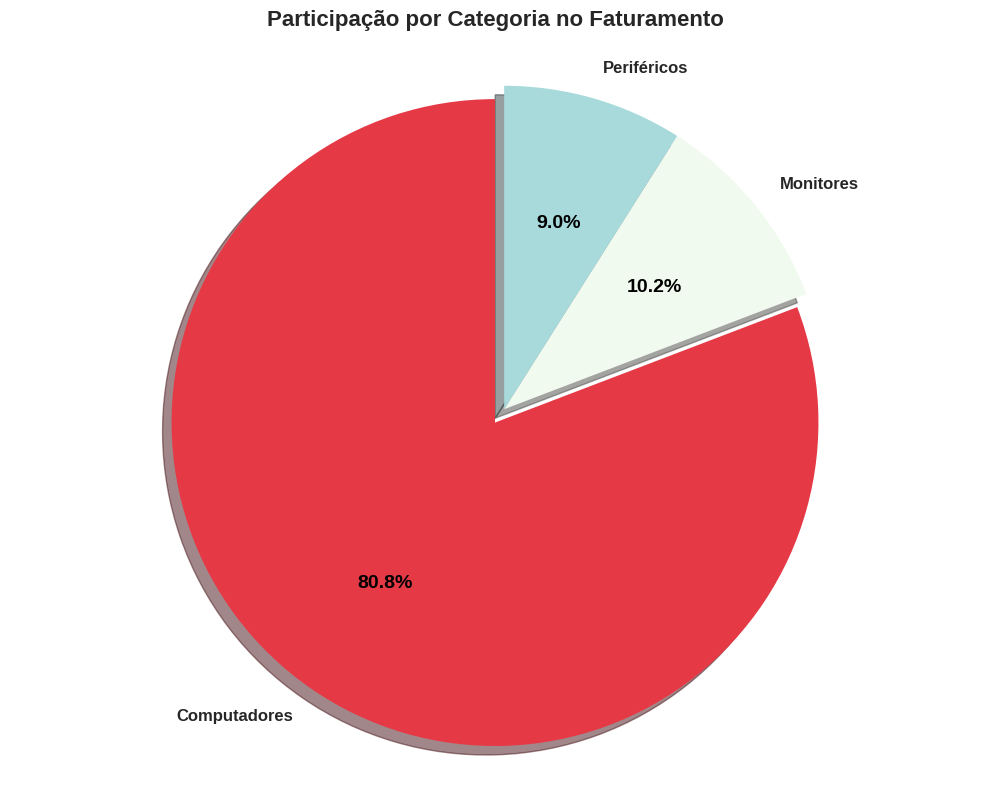

Atenção: Gráficos de pizza devem ser usados com moderação!
  - Úteis para mostrar proporções simples
  - Evite usar com muitas categorias (máximo 5-6)
  - Gráficos de barras geralmente são mais efetivos


In [ ]:
# Criar gráfico de pizza
plt.figure(figsize=(10, 8))

cores_pizza = ['#E63946', '#F1FAEE', '#A8DADC']
explode = (0.05, 0, 0)  # Destacar a maior fatia

wedges, texts, autotexts = plt.pie(participacao.values,
                                    labels=participacao.index,
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    colors=cores_pizza,
                                    explode=explode,
                                    shadow=True,
                                    textprops={'fontsize': 12, 'fontweight': 'bold'})

# Customizar texto
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(14)

plt.title('Participação por Categoria no Faturamento',
          fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

print("Atenção: Gráficos de pizza devem ser usados com moderação!")
print("  - Úteis para mostrar proporções simples")
print("  - Evite usar com muitas categorias (máximo 5-6)")
print("  - Gráficos de barras geralmente são mais efetivos")

### 3.5 Subplots - Múltiplos Gráficos

In [ ]:
# 1. Vendas por categoria
vendas_cat = df.groupby('categoria')['valor_total'].sum()
vendas_cat

,valor_total
categoria,
Computadores,21600.0
Monitores,2730.0
Periféricos,2401.0


In [ ]:
# 2. Vendas por vendedor
vendas_vend = df.groupby('vendedor')['valor_total'].sum().sort_values()
vendas_vend

,valor_total
vendedor,
Carlos,4145.0
Ana,9796.0
Beatriz,12790.0


In [ ]:
# 3. Quantidade por produto
qtd_prod = df.groupby('produto')['quantidade'].sum().sort_values(ascending=False)
qtd_prod

,quantidade
produto,
Mouse,13
Teclado,7
Notebook,6
Monitor,3
Webcam,2


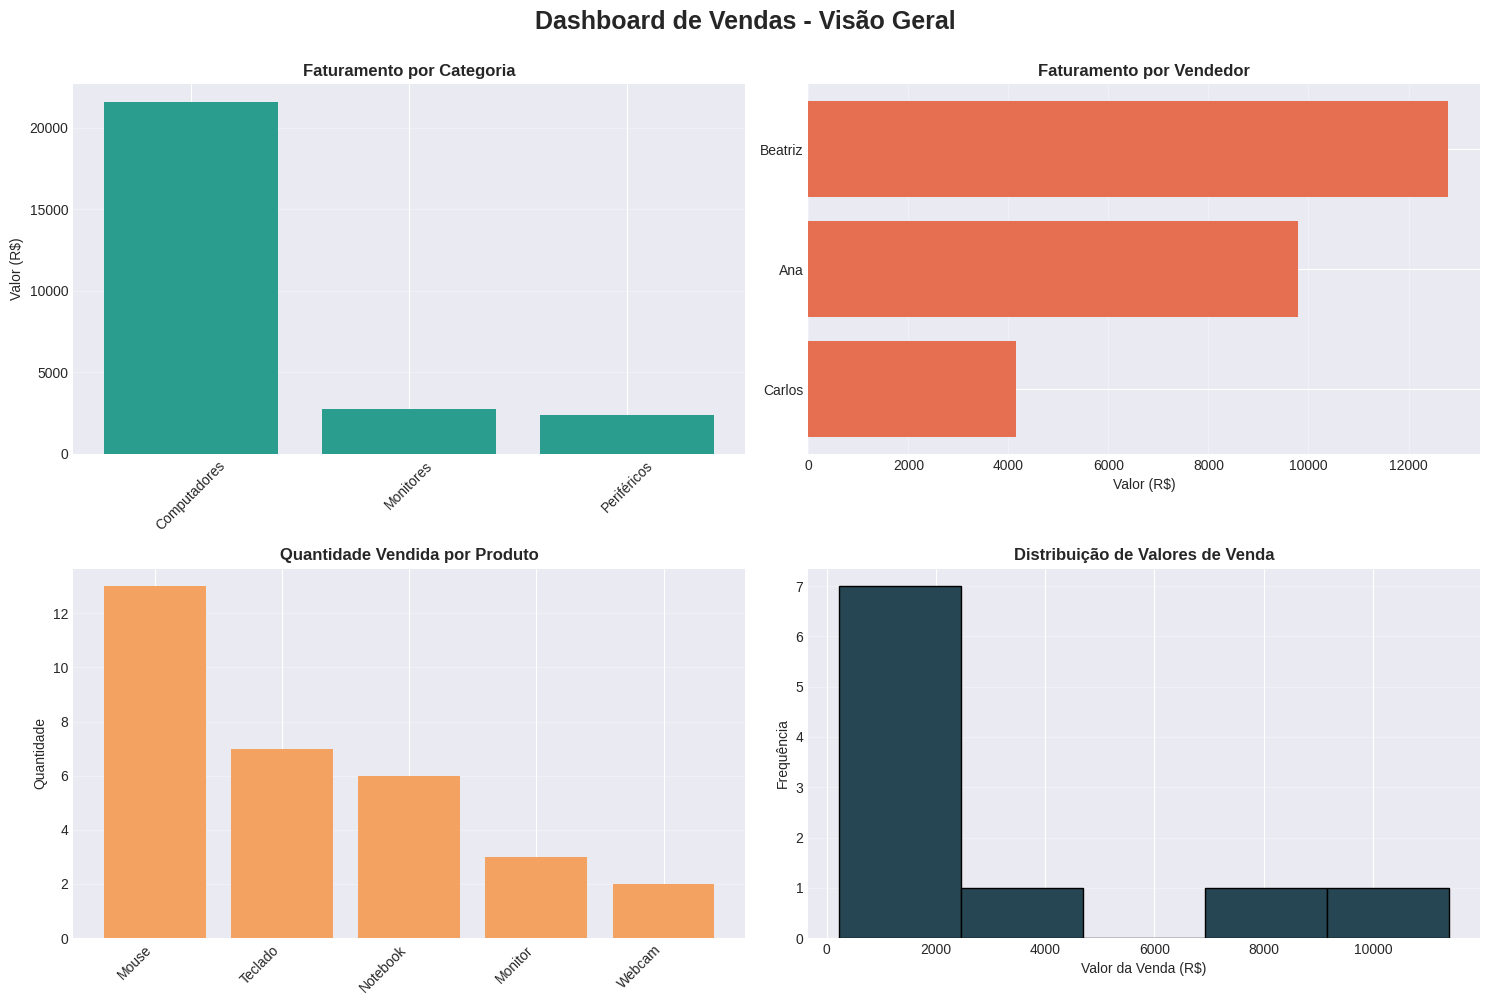

In [ ]:
# Criar figura com 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Dashboard de Vendas - Visão Geral', fontsize=18, fontweight='bold', y=1.00)

# 1. Vendas por categoria
# vendas_cat = df.groupby('categoria')['valor_total'].sum()
axes[0, 0].bar(vendas_cat.index, vendas_cat.values, color='#2A9D8F')
axes[0, 0].set_title('Faturamento por Categoria', fontweight='bold')
axes[0, 0].set_ylabel('Valor (R$)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Vendas por vendedor
# vendas_vend = df.groupby('vendedor')['valor_total'].sum().sort_values()
axes[0, 1].barh(vendas_vend.index, vendas_vend.values, color='#E76F51')
axes[0, 1].set_title('Faturamento por Vendedor', fontweight='bold')
axes[0, 1].set_xlabel('Valor (R$)')
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Quantidade por produto
# qtd_prod = df.groupby('produto')['quantidade'].sum().sort_values(ascending=False)
axes[1, 0].bar(range(len(qtd_prod)), qtd_prod.values, color='#F4A261')
axes[1, 0].set_title('Quantidade Vendida por Produto', fontweight='bold')
axes[1, 0].set_ylabel('Quantidade')
axes[1, 0].set_xticks(range(len(qtd_prod)))
axes[1, 0].set_xticklabels(qtd_prod.index, rotation=45, ha='right')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Distribuição de valores
axes[1, 1].hist(df['valor_total'], bins=5, color='#264653', edgecolor='black')
axes[1, 1].set_title('Distribuição de Valores de Venda', fontweight='bold')
axes[1, 1].set_xlabel('Valor da Venda (R$)')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---
##4. Visualizações com Seaborn

Seaborn oferece gráficos estatísticos mais sofisticados e elegantes.

### 4.1 Countplot - Contagem por Categoria

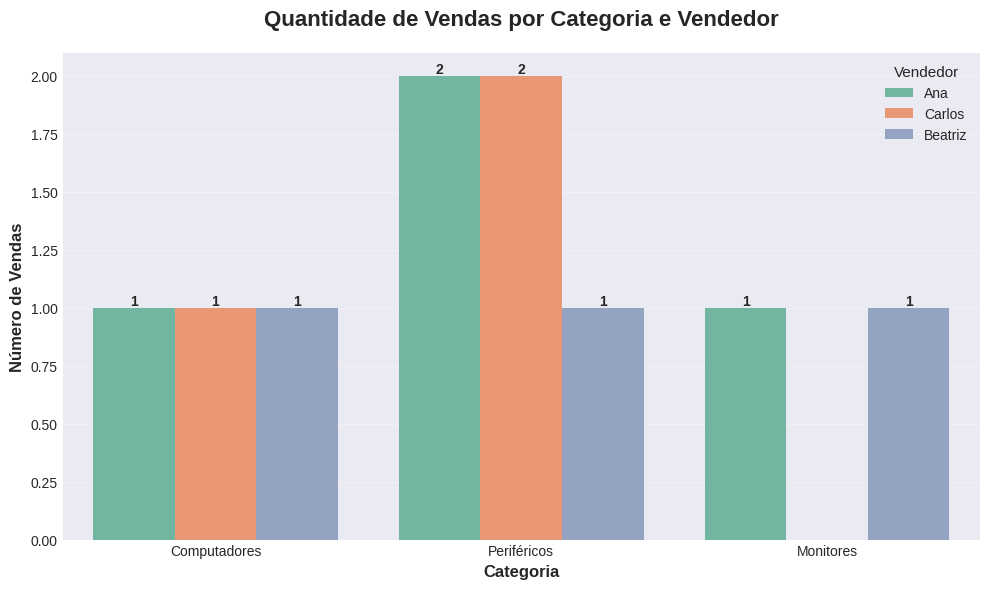


Insight: Countplot é ideal para visualizar frequências categóricas


In [ ]:
plt.figure(figsize=(10, 6))

# Criar countplot
ax = sns.countplot(data=df, x='categoria', hue='vendedor', palette='Set2')

# Customização
plt.title('Quantidade de Vendas por Categoria e Vendedor',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Categoria', fontsize=12, fontweight='bold')
plt.ylabel('Número de Vendas', fontsize=12, fontweight='bold')
plt.legend(title='Vendedor', title_fontsize=11, fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for container in ax.containers:
    ax.bar_label(container, fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nInsight: Countplot é ideal para visualizar frequências categóricas")

### 4.2 Barplot - Comparação de Médias

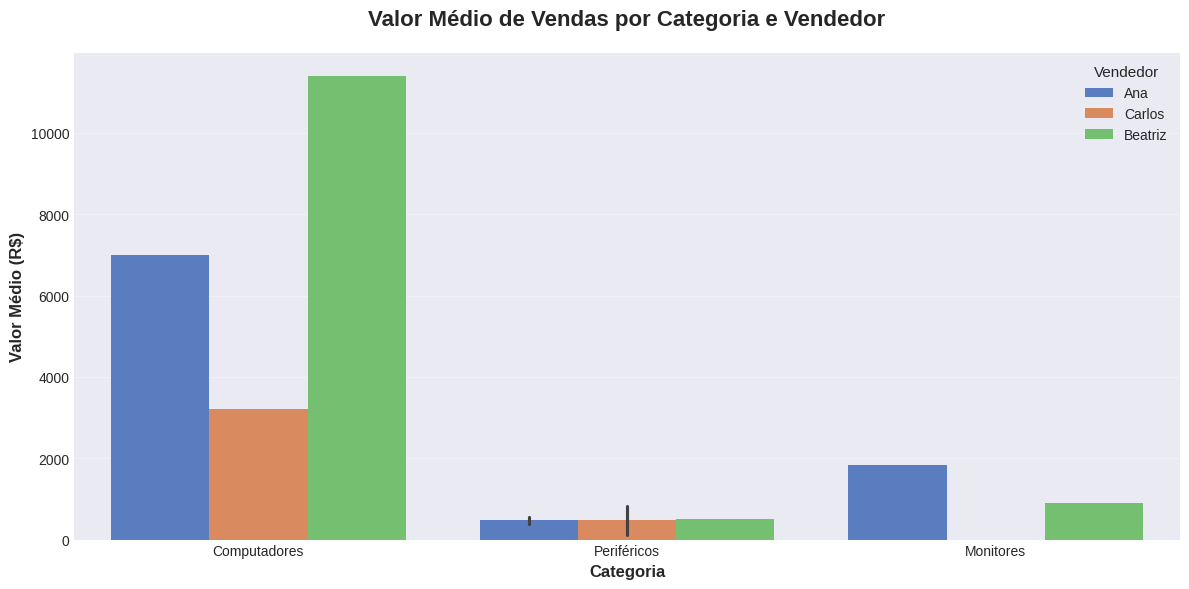


Insight: As barras mostram a média, as linhas verticais o desvio padrão


In [ ]:
plt.figure(figsize=(12, 6))

# Barplot mostra média + intervalo de confiança
sns.barplot(data=df, x='categoria', y='valor_total',
            hue='vendedor', palette='muted', errorbar='sd')

# Customização
plt.title('Valor Médio de Vendas por Categoria e Vendedor',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Categoria', fontsize=12, fontweight='bold')
plt.ylabel('Valor Médio (R$)', fontsize=12, fontweight='bold')
plt.legend(title='Vendedor', title_fontsize=11, fontsize=10)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nInsight: As barras mostram a média, as linhas verticais o desvio padrão")

### 4.3 Boxplot - Distribuição e Outliers

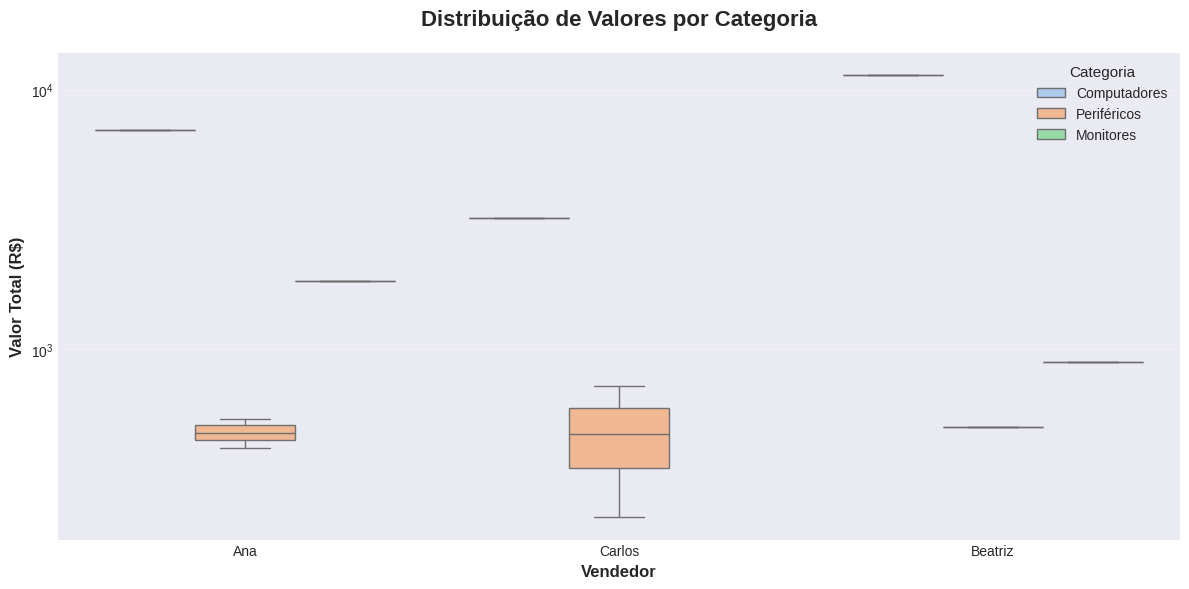


Como ler um Boxplot:
  - Caixa = intervalo entre Q1 (25%) e Q3 (75%)
  - Linha dentro da caixa = mediana (Q2/50%)
  - Linhas verticais (whiskers) = valores dentro de 1.5*IQR
  - Pontos isolados = outliers (valores extremos)


In [ ]:
plt.figure(figsize=(12, 6))

# Criar boxplot
sns.boxplot(data=df, x='vendedor', y='valor_total',
            hue='categoria', palette='pastel')

# Customização
plt.title('Distribuição de Valores por Categoria',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Vendedor', fontsize=12, fontweight='bold')
plt.ylabel('Valor Total (R$)', fontsize=12, fontweight='bold')
plt.legend(title='Categoria', title_fontsize=11, fontsize=10, loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show()

print("\nComo ler um Boxplot:")
print("  - Caixa = intervalo entre Q1 (25%) e Q3 (75%)")
print("  - Linha dentro da caixa = mediana (Q2/50%)")
print("  - Linhas verticais (whiskers) = valores dentro de 1.5*IQR")
print("  - Pontos isolados = outliers (valores extremos)")

### 4.4 Violinplot - Distribuição Detalhada

In [ ]:
df

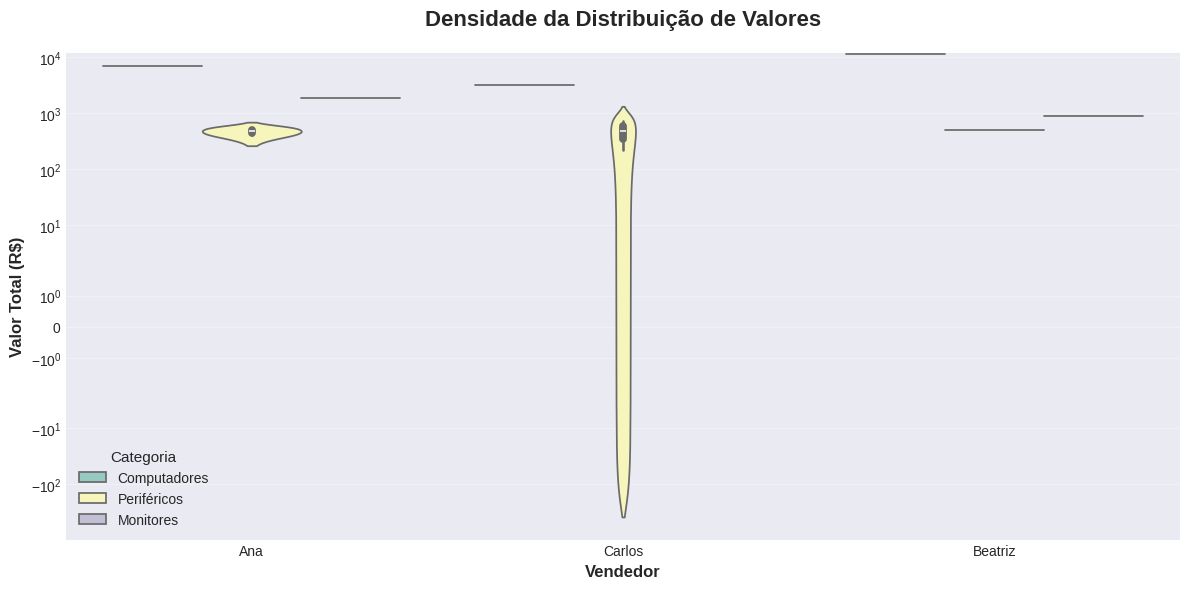


Violinplot = Boxplot + Densidade
  - Largura do 'violino' indica densidade de dados
  - Útil para ver a distribuição completa dos dados


In [ ]:
plt.figure(figsize=(12, 6))

# Criar violinplot
sns.violinplot(data=df, x='vendedor', y='valor_total',
               hue='categoria', palette='Set3', split=False)

# Customização
plt.title('Densidade da Distribuição de Valores',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Vendedor', fontsize=12, fontweight='bold')
plt.ylabel('Valor Total (R$)', fontsize=12, fontweight='bold')
plt.legend(title='Categoria', title_fontsize=11, fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.yscale('symlog')

plt.tight_layout()
plt.show()

print("\nViolinplot = Boxplot + Densidade")
print("  - Largura do 'violino' indica densidade de dados")
print("  - Útil para ver a distribuição completa dos dados")

### 4.5 Scatter Plot - Relação entre Variáveis

In [ ]:
plt.figure(figsize=(12, 6))

# Criar scatter plot
sns.scatterplot(data=df, x='quantidade', y='valor_total',
                hue='categoria', size='preco_unitario',
                sizes=(100, 500), alpha=0.7, palette='deep')

# Customização
plt.title('Relação entre Quantidade e Valor Total',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Quantidade Vendida', fontsize=12, fontweight='bold')
plt.ylabel('Valor Total (R$)', fontsize=12, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nScatter plot revela:")
print("  - Correlação entre variáveis")
print("  - Agrupamentos (clusters)")
print("  - Outliers e anomalias")

### 4.6 Heatmap - Matriz de Correlação

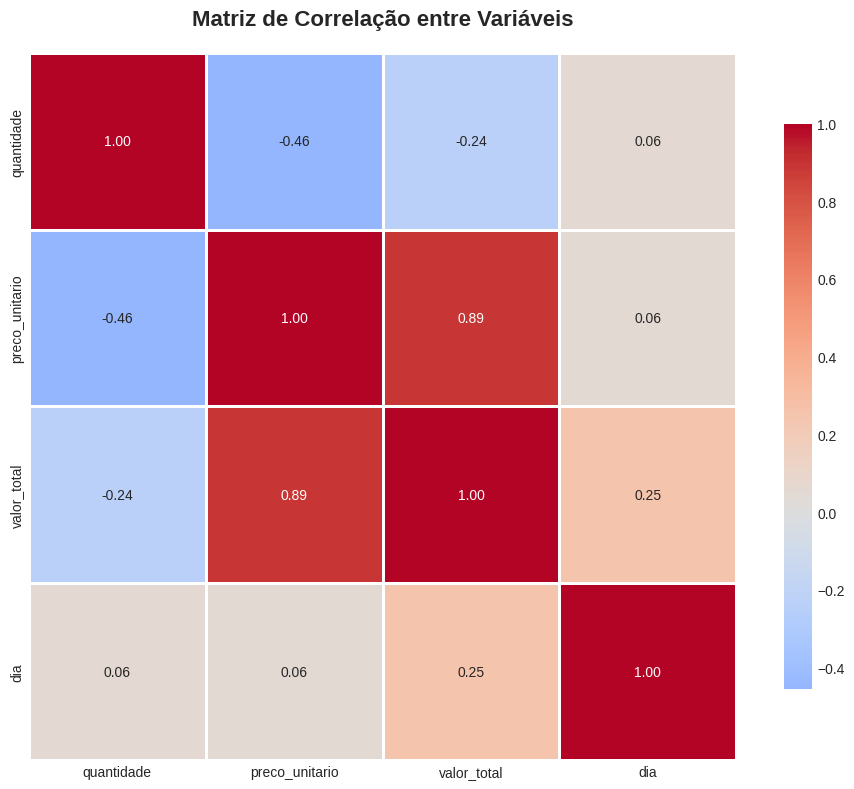


Como interpretar:
  - Valores próximos de +1: correlação positiva forte
  - Valores próximos de -1: correlação negativa forte
  - Valores próximos de 0: sem correlação
  - Cores quentes: correlação positiva
  - Cores frias: correlação negativa


In [ ]:
# Preparar dados numéricos
df_numeric = df[['quantidade', 'preco_unitario', 'valor_total', 'dia']]
correlacao = df_numeric.corr()

# Criar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})

# Customização
plt.title('Matriz de Correlação entre Variáveis',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nComo interpretar:")
print("  - Valores próximos de +1: correlação positiva forte")
print("  - Valores próximos de -1: correlação negativa forte")
print("  - Valores próximos de 0: sem correlação")
print("  - Cores quentes: correlação positiva")
print("  - Cores frias: correlação negativa")

### 4.7 Pairplot - Relações Múltiplas

In [ ]:
# Criar pairplot
pairplot_df = df[['quantidade', 'preco_unitario', 'valor_total', 'categoria']]

g = sns.pairplot(pairplot_df, hue='categoria', palette='Set1',
                 diag_kind='kde', plot_kws={'alpha': 0.6},
                 height=3, aspect=1.2)

g.fig.suptitle('Relações entre Todas as Variáveis Numéricas',
               fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

print("\nPairplot é poderoso para:")
print("  - Visualizar todas as relações de uma vez")
print("  - Identificar padrões entre categorias")
print("  - Diagonal mostra distribuição de cada variável")

### 4.8 Catplot - Gráficos Categóricos Facetados

In [ ]:
# Criar catplot com facetas
g = sns.catplot(data=df, x='produto', y='valor_total',
                col='categoria', kind='bar',
                height=5, aspect=1.2, palette='viridis')

# Customização
g.fig.suptitle('Faturamento por Produto em Cada Categoria',
               fontsize=16, fontweight='bold', y=1.02)
g.set_axis_labels('Produto', 'Valor Total (R$)', fontweight='bold')
g.set_xticklabels(rotation=45, ha='right')

for ax in g.axes.flat:
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---
##5. Visualizações Avançadas


### 5.1 Gráfico de Barras Agrupadas e Empilhadas

In [ ]:
# Preparar dados
vendas_vend_cat = df.pivot_table(values='valor_total',
                                  index='vendedor',
                                  columns='categoria',
                                  aggfunc='sum',
                                  fill_value=0)

# Criar subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Barras Agrupadas
vendas_vend_cat.plot(kind='bar', ax=ax1, color=['#E63946', '#F1FAEE', '#A8DADC'])
ax1.set_title('Faturamento por Vendedor e Categoria (Agrupado)',
              fontsize=14, fontweight='bold')
ax1.set_xlabel('Vendedor', fontweight='bold')
ax1.set_ylabel('Valor Total (R$)', fontweight='bold')
ax1.legend(title='Categoria', title_fontsize=10)
ax1.grid(axis='y', alpha=0.3)
ax1.tick_params(axis='x', rotation=0)

# Gráfico 2: Barras Empilhadas
vendas_vend_cat.plot(kind='bar', stacked=True, ax=ax2,
                     color=['#E63946', '#F1FAEE', '#A8DADC'])
ax2.set_title('Faturamento por Vendedor e Categoria (Empilhado)',
              fontsize=14, fontweight='bold')
ax2.set_xlabel('Vendedor', fontweight='bold')
ax2.set_ylabel('Valor Total (R$)', fontweight='bold')
ax2.legend(title='Categoria', title_fontsize=10)
ax2.grid(axis='y', alpha=0.3)
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("\nComparação:")
print("  - Agrupado: melhor para comparar categorias dentro de cada vendedor")
print("  - Empilhado: melhor para ver o total de cada vendedor")

### 5.3 Combo Chart - Barras + Linha

In [ ]:
# Preparar dados
vendas_dia_agg = df.groupby('data').agg({
    'valor_total': 'sum',
    'quantidade': 'sum'
}).reset_index()

# Criar figura com dois eixos Y
fig, ax1 = plt.subplots(figsize=(14, 6))

# Eixo Y principal - Barras
color = '#2A9D8F'
ax1.bar(vendas_dia_agg['data'], vendas_dia_agg['valor_total'],
        color=color, alpha=0.7, label='Faturamento')
ax1.set_xlabel('Data', fontsize=12, fontweight='bold')
ax1.set_ylabel('Faturamento (R$)', fontsize=12, fontweight='bold', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Eixo Y secundário - Linha
ax2 = ax1.twinx()
color = '#E76F51'
ax2.plot(vendas_dia_agg['data'], vendas_dia_agg['quantidade'],
         color=color, marker='o', linewidth=3, markersize=8, label='Quantidade')
ax2.set_ylabel('Quantidade Vendida', fontsize=12, fontweight='bold', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Título e legenda
plt.title('Evolução do Faturamento e Quantidade ao Longo do Tempo',
          fontsize=16, fontweight='bold', pad=20)

# Combinar legendas
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

print("\nCombo chart é ideal para:")
print("  - Comparar métricas com escalas diferentes")
print("  - Mostrar relação entre volume e valor")
print("  - Dashboards executivos")

---
##6. Customização e Estilo

### 6.1 Estilos Predefinidos do Matplotlib

In [ ]:
# Ver estilos disponíveis
print("Estilos disponíveis no Matplotlib:")
print(plt.style.available)

# Testar diferentes estilos
estilos = ['default', 'seaborn-v0_8-darkgrid', 'ggplot', 'fivethirtyeight']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Comparação de Estilos', fontsize=18, fontweight='bold')

for idx, (ax, estilo) in enumerate(zip(axes.flat, estilos)):
    with plt.style.context(estilo):
        vendas_cat = df.groupby('categoria')['valor_total'].sum()
        ax.bar(vendas_cat.index, vendas_cat.values)
        ax.set_title(f'Estilo: {estilo}', fontweight='bold')
        ax.set_xlabel('Categoria')
        ax.set_ylabel('Valor (R$)')
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 6.2 Paletas de Cores do Seaborn

In [ ]:
# Mostrar diferentes paletas
paletas = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']

fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('Paletas de Cores do Seaborn', fontsize=18, fontweight='bold')

for ax, paleta in zip(axes.flat, paletas):
    sns.countplot(data=df, x='categoria', hue='vendedor',
                  palette=paleta, ax=ax)
    ax.set_title(f'Paleta: {paleta}', fontweight='bold')
    ax.set_xlabel('Categoria')
    ax.set_ylabel('Contagem')
    ax.legend(title='Vendedor', fontsize=8)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nDicas de paletas:")
print("  - deep: cores vibrantes para apresentações")
print("  - pastel: cores suaves para relatórios")
print("  - colorblind: acessível para daltônicos")

### 6.3 Criando Paleta Personalizada

In [ ]:
# Definir cores personalizadas
cores_empresa = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

# Usar no gráfico
plt.figure(figsize=(12, 6))
produtos = df.groupby('produto')['valor_total'].sum().sort_values(ascending=False)
plt.bar(range(len(produtos)), produtos.values, color=cores_empresa)
plt.xticks(range(len(produtos)), produtos.index, rotation=45, ha='right')
plt.title('Faturamento por Produto - Cores Personalizadas',
          fontsize=16, fontweight='bold')
plt.ylabel('Faturamento (R$)', fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nDica: Use cores da identidade visual da empresa")

---
## 7. Salvando Gráficos

### 7.1 Diferentes Formatos de Exportação

In [ ]:
# Criar um gráfico exemplo
fig, ax = plt.subplots(figsize=(10, 6))
vendas_cat = df.groupby('categoria')['valor_total'].sum()
ax.bar(vendas_cat.index, vendas_cat.values, color='#2A9D8F')
ax.set_title('Faturamento por Categoria', fontsize=16, fontweight='bold')
ax.set_ylabel('Valor (R$)', fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Salvar em diferentes formatos
plt.savefig('grafico_vendas.png', dpi=300, bbox_inches='tight')  # Alta resolução
plt.savefig('grafico_vendas.pdf', bbox_inches='tight')  # Vetorial
plt.savefig('grafico_vendas.svg', bbox_inches='tight')  # Vetorial
plt.savefig('grafico_vendas.jpg', dpi=150, bbox_inches='tight')  # JPEG

plt.show()

print("Gráficos salvos com sucesso!")
print("\nFormatos salvos:")
print("  - PNG (300 dpi): Para apresentações e impressão")
print("  - PDF: Para documentos profissionais")
print("  - SVG: Para edição posterior")
print("  - JPG: Para web")

print("\nParâmetros importantes:")
print("  - dpi: resolução (300 para impressão, 150 para tela)")
print("  - bbox_inches='tight': remove espaços em branco")
print("  - transparent=True: fundo transparente")

---
##8. Boas Práticas de Visualização

### 8.1 Comparação: Bom vs. Ruim

In [ ]:
# Dados de exemplo
categorias = df.groupby('categoria')['valor_total'].sum().sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Boas Práticas de Visualização', fontsize=18, fontweight='bold')

# Gráfico RUIM
ax1.bar(categorias.index, categorias.values, color=['red', 'green', 'blue'])
ax1.set_title('Exemplo RUIM', fontsize=14, color='red')
ax1.tick_params(labelsize=8)
# Sem labels, sem grid, cores aleatórias

# Gráfico BOM
bars = ax2.bar(categorias.index, categorias.values,
               color=['#2A9D8F', '#E76F51', '#F4A261'])
ax2.set_title('Exemplo BOM', fontsize=14, color='green', fontweight='bold')
ax2.set_xlabel('Categoria', fontsize=12, fontweight='bold')
ax2.set_ylabel('Faturamento (R$)', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.tick_params(labelsize=10)

# Adicionar valores
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'R$ {height:,.0f}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nCHECKLIST DE BOAS PRÁTICAS:")
print("\nO QUE FAZER:")
print("  1. Sempre incluir título descritivo")
print("  2. Labels claros nos eixos X e Y")
print("  3. Grid suave para facilitar leitura")
print("  4. Cores harmoniosas e com propósito")
print("  5. Tamanho de fonte legível (10-12pt)")
print("  6. Adicionar valores quando relevante")
print("  7. Remover elementos desnecessários")
print("  8. Ordenar dados quando possível")
print("\nO QUE EVITAR:")
print("  1. Gráficos 3D desnecessários")
print("  2. Muitas cores sem significado")
print("  3. Texto muito pequeno ou ilegível")
print("  4. Excesso de informação")
print("  5. Falta de contexto ou legenda")
print("  6. Escalas enganosas")
print("  7. Gráficos de pizza com muitas fatias")

### 8.2 Guia de Seleção de Gráficos

In [ ]:
# Criar guia visual
guia = {
    'Comparação': ['Barras', 'Barras Horizontais', 'Colunas Agrupadas'],
    'Distribuição': ['Histograma', 'Boxplot', 'Violinplot', 'Densidade'],
    'Relação': ['Scatter', 'Linha', 'Heatmap'],
    'Composição': ['Pizza (até 5 categorias)', 'Área Empilhada', 'Treemap'],
    'Temporal': ['Linha', 'Área', 'Barras'],
}

print("GUIA DE SELEÇÃO DO TIPO DE GRÁFICO")

for objetivo, tipos in guia.items():
    print(f"\n{objetivo.upper()}:")
    for tipo in tipos:
        print(f"  • {tipo}")

print("\nPERGUNTAS PARA ESCOLHER O GRÁFICO CERTO:")
print("  1. Qual é a mensagem principal?")
print("  2. Quantas variáveis tenho?")
print("  3. Qual é o tipo de dados (categórico, numérico, temporal)?")
print("  4. Quantos pontos de dados tenho?")
print("  5. Quem é a audiência?")

---
##9. Dashboard Completo - Integrando Tudo

Vamos criar um dashboard profissional combinando múltiplas visualizações.

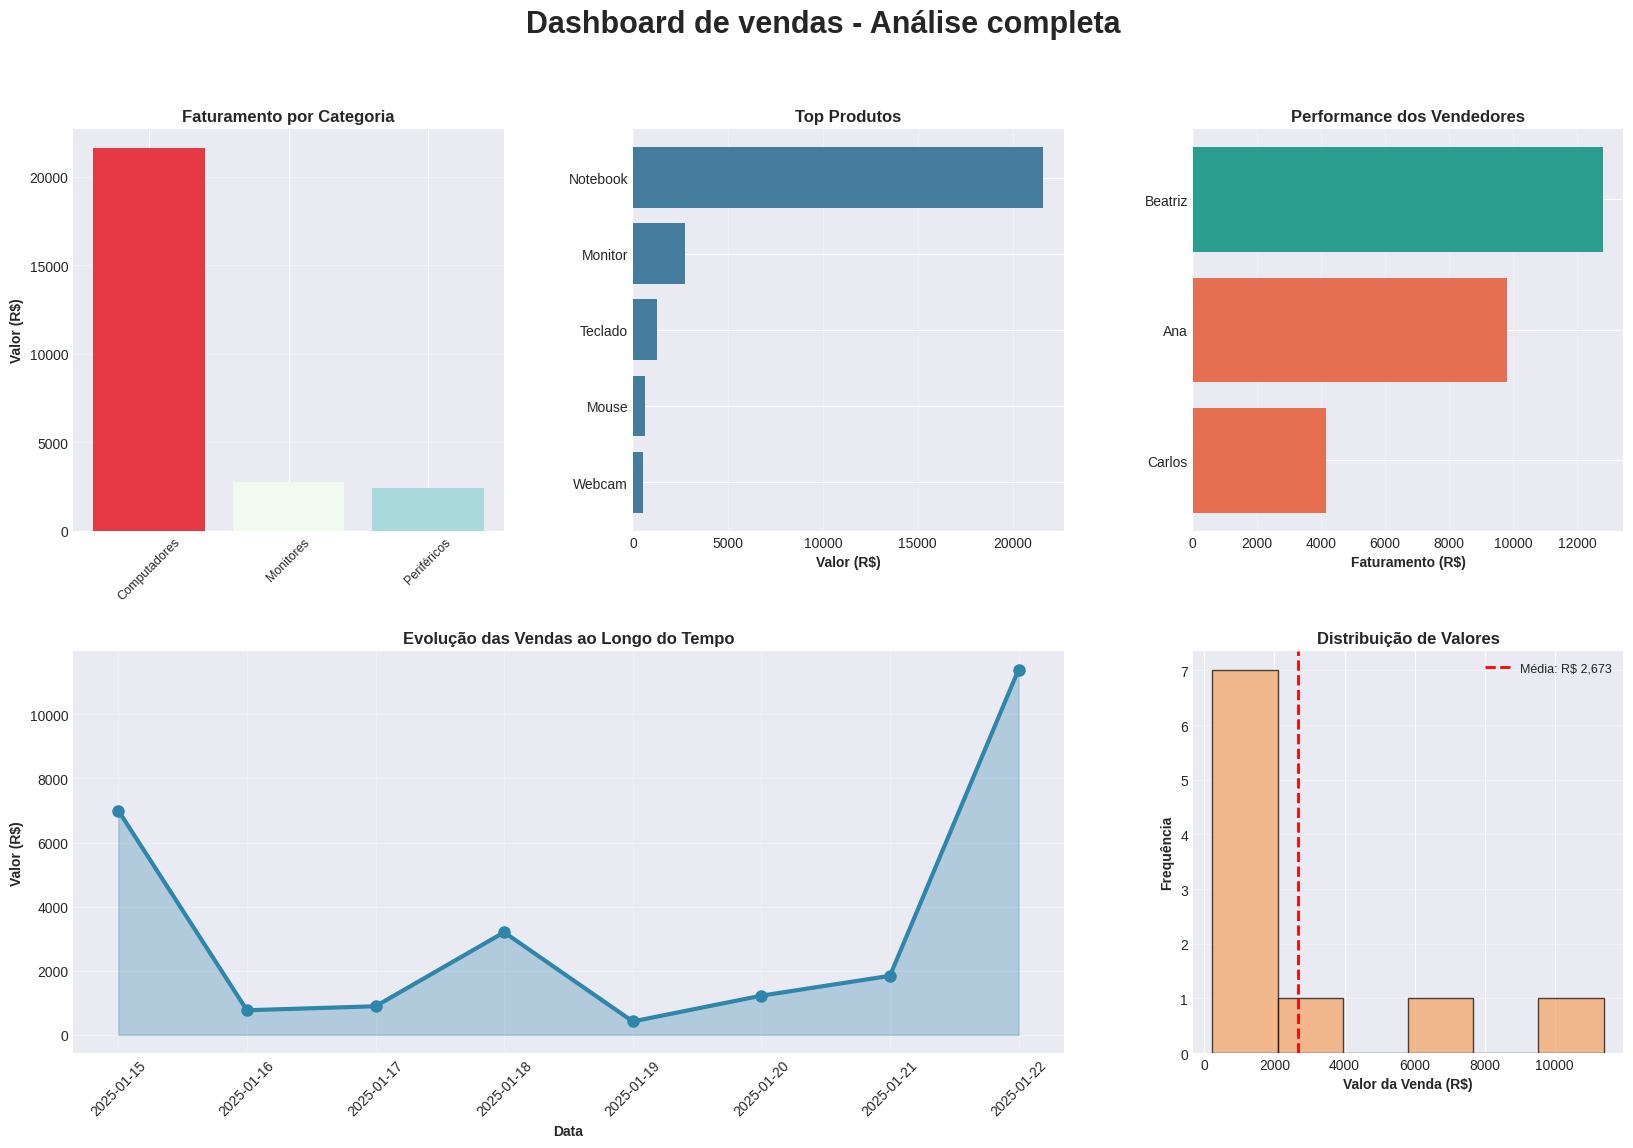


Dashboard criado e salvo com sucesso!
  Arquivo: dashboard_vendas_completo.png


In [ ]:
# Criar dashboard completo
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# Título principal
fig.suptitle('Dashboard de vendas - Análise completa',
             fontsize=22, fontweight='bold', y=0.98)

# 1. KPIs (Cards no topo)
# ax_kpi = fig.add_subplot(gs[0, :])
# ax_kpi.axis('off')
# kpi_text = f"""
# FATURAMENTO TOTAL: R$ {df['valor_total'].sum():,.2f}  |
# TICKET MÉDIO: R$ {df['valor_total'].mean():,.2f}  |
# TOTAL DE VENDAS: {len(df)}  |
# ITENS VENDIDOS: {df['quantidade'].sum()}
# """
# ax_kpi.text(0.5, 0.5, kpi_text, ha='center', va='center',
#             fontsize=14, fontweight='bold',
#             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))

# 2. Vendas por Categoria
ax1 = fig.add_subplot(gs[0, 0])
vendas_cat = df.groupby('categoria')['valor_total'].sum().sort_values(ascending=False)
ax1.bar(vendas_cat.index, vendas_cat.values, color=['#E63946', '#F1FAEE', '#A8DADC'])
ax1.set_title('Faturamento por Categoria', fontweight='bold', fontsize=12)
ax1.set_ylabel('Valor (R$)', fontweight='bold')
ax1.tick_params(axis='x', rotation=45, labelsize=9)
ax1.grid(axis='y', alpha=0.3)

# 3. Top Produtos
ax2 = fig.add_subplot(gs[0, 1])
top_prod = df.groupby('produto')['valor_total'].sum().sort_values(ascending=True)
ax2.barh(top_prod.index, top_prod.values, color='#457B9D')
ax2.set_title('Top Produtos', fontweight='bold', fontsize=12)
ax2.set_xlabel('Valor (R$)', fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# 4. Performance Vendedores
ax3 = fig.add_subplot(gs[0, 2])
vendas_vend = df.groupby('vendedor')['valor_total'].sum().sort_values()
colors_vend = ['#2A9D8F' if v == vendas_vend.max() else '#E76F51' for v in vendas_vend]
ax3.barh(vendas_vend.index, vendas_vend.values, color=colors_vend)
ax3.set_title('Performance dos Vendedores', fontweight='bold', fontsize=12)
ax3.set_xlabel('Faturamento (R$)', fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# 5. Evolução Temporal
ax4 = fig.add_subplot(gs[1, :2])
vendas_tempo = df.groupby('data')['valor_total'].sum()
ax4.plot(vendas_tempo.index, vendas_tempo.values,
         marker='o', linewidth=3, markersize=8, color='#2E86AB')
ax4.fill_between(vendas_tempo.index, vendas_tempo.values, alpha=0.3, color='#2E86AB')
ax4.set_title('Evolução das Vendas ao Longo do Tempo', fontweight='bold', fontsize=12)
ax4.set_xlabel('Data', fontweight='bold')
ax4.set_ylabel('Valor (R$)', fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

# 6. Distribuição de Valores
ax5 = fig.add_subplot(gs[1, 2])
ax5.hist(df['valor_total'], bins=6, color='#F4A261', edgecolor='black', alpha=0.7)
ax5.axvline(df['valor_total'].mean(), color='red', linestyle='--',
            linewidth=2, label=f"Média: R$ {df['valor_total'].mean():,.0f}")
ax5.set_title('Distribuição de Valores', fontweight='bold', fontsize=12)
ax5.set_xlabel('Valor da Venda (R$)', fontweight='bold')
ax5.set_ylabel('Frequência', fontweight='bold')
ax5.legend(fontsize=9)
ax5.grid(axis='y', alpha=0.3)

plt.savefig('dashboard_vendas_completo.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nDashboard criado e salvo com sucesso!")
print("  Arquivo: dashboard_vendas_completo.png")

---
### Recursos Adicionais:

- [Matplotlib Gallery](https://matplotlib.org/stable/gallery/index.html)
- [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)
- [From Data to Viz](https://www.data-to-viz.com/)
- [ColorBrewer](https://colorbrewer2.org/)
- [The Python Graph Gallery](https://www.python-graph-gallery.com/)

### Livros
- [Fundamentals of Data Visualization](https://clauswilke.com/dataviz/index.html)